## EDA And Feature Engineering Flight Price Prediction
### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# !pip install openpyxl 

In [4]:
df = pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# alll features are of object type
df.shape

(10683, 11)

In [6]:
df.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

* "Route" and  "Total_Stops" column has `one` missing  value

In [7]:
df.isna().sum() # data.isnull()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df[df['Route'].isna() | df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


 #### How to Deal with it 
    1. Handling of Missing Values:
        1. Delete Observation
        2. Continuous :
            Mean 
            Median
            KNN Imputation(k > 1)
        3. Categorical:
            Mode
            KNN Imputation (k = 1) >> nan Euclidean Distance
        4. Linear Regression

* Here it is not going to make difference as much so we will delete the 
observations

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [13]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### **1. `Date-of-Journy`**

In [14]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
# df.head()
# df.info()

In [15]:
# We can Remove Year values as all the values are same
df['Date_of_Journey'].dt.year.unique()

array([2019])

In [16]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
# df.head()
# df.info()

In [17]:
# Check these three columns now are in integer
# drop the column name 'Date-of-Jouryn'

In [18]:
df.drop('Date_of_Journey',axis=1,inplace=True)

###  **2.`Arrival_Time`**

we can use pandas date time by to convert object to int using the fallwoing
   1. df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

After that convert it into hours and minutes

   2. df['Arrival Hours'] = df['Arrival_Time'].dt.hour
   2. df['Arrival Minutes] = df['Arrival_Time'].dt.minutes

In [19]:
# remove date from arrival time 
# use only hours and minutes
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [20]:
# Arrival Hours 
df['Arrival_hours'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]

In [21]:
# Arrival Minutes
df['Arrival_min'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [22]:
# Drop the column name arrival Minutes
df.drop('Arrival_Time',axis=1,inplace=True)

convert `Arrival hours` and `Arrival Minutes` in integer type

In [23]:
df['Arrival_hours'] = df['Arrival_hours'].astype(int)
df['Arrival_min'] = df['Arrival_min'].astype(int)

### **3.`Dep_Time`**

we can use pandas date time to convert object date to integer by using the fallwoing
   1. df['Dept_Time'] = pd.to_datetime(df['Dept_Time'])

After that convert it into hours and minutes

   2. df['Dep Hours'] = df['Dep_Time'].dt.hour
   3. df['Dep Minutes] = df['Dep_Time'].dt.minutes

In [24]:
# Do the same for this column

In [25]:
df['Dept_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dept_min'] = df['Dep_Time'].str.split(':').str[1]
df['Dept_hour'] = df['Dept_hour'].astype(int)
df['Dept_min'] = df['Dept_min'].astype(int)

In [26]:
df.drop('Dep_Time', axis=1, inplace=True)

In [27]:
# df.info()

### **`Route`**

`Drop the "Route" column as it is not necessory and also repetative`

In [28]:
# Drop route because information is already preasent here
df.drop('Route', axis=1,inplace=True)

### **4.`Duration`**

- we are converting the duration of journey in minutes

In [29]:
# df['Duration'].str.split('h').str[0]
# df['Duration'].str.split(' ').str[1]

In [30]:
def convert_duration(duration):
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][:-1])
        minutes = int(duration.split()[1][:-1])
        return hours * 60 + minutes
    else:
        return int(duration[:-1]) * 60 

In [31]:
df['Duration'] = df['Duration'].apply(convert_duration)

All the values in the `Duration` column is now converted to the 
minutes

In [32]:
# df.head()
# df.info()

### **5.`Total Stops`**

In [33]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [34]:
# look at the unique values first
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [35]:
# use map method from pandas
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4 })

In [36]:
# df.head()
# df.info()

### **6.`Additional Info`**

In [37]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

* Mejority rows '8345` of the rows has no info so it is better to drop such 
column

In [38]:
# df.drop('Additional_Info', axis=1, inplace=True)

### Lets Draw some relation between `Price` -> `Source` -> & `Destination`

In [39]:
df.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Additional_Info'], dtype='object')

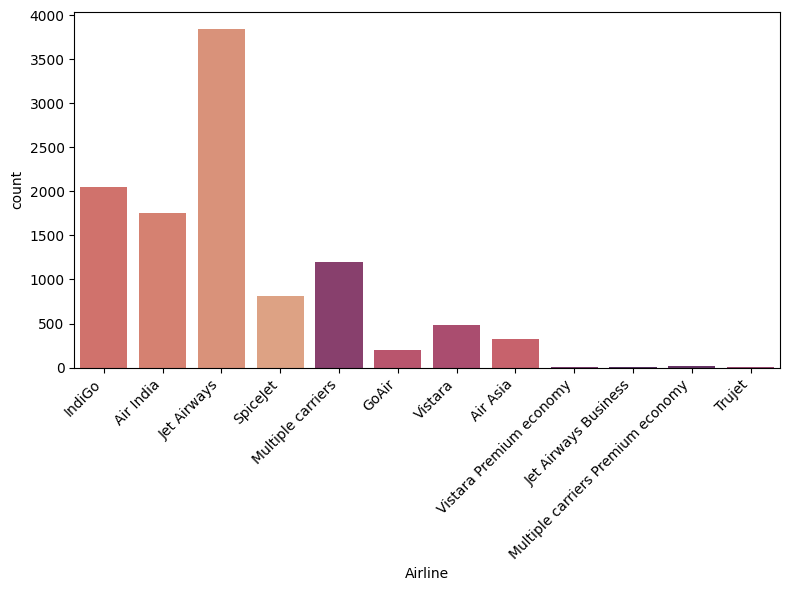

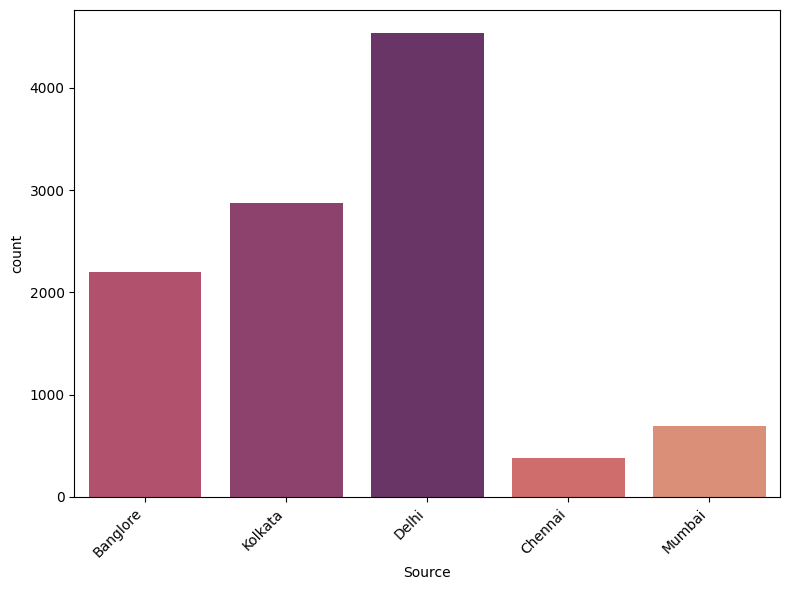

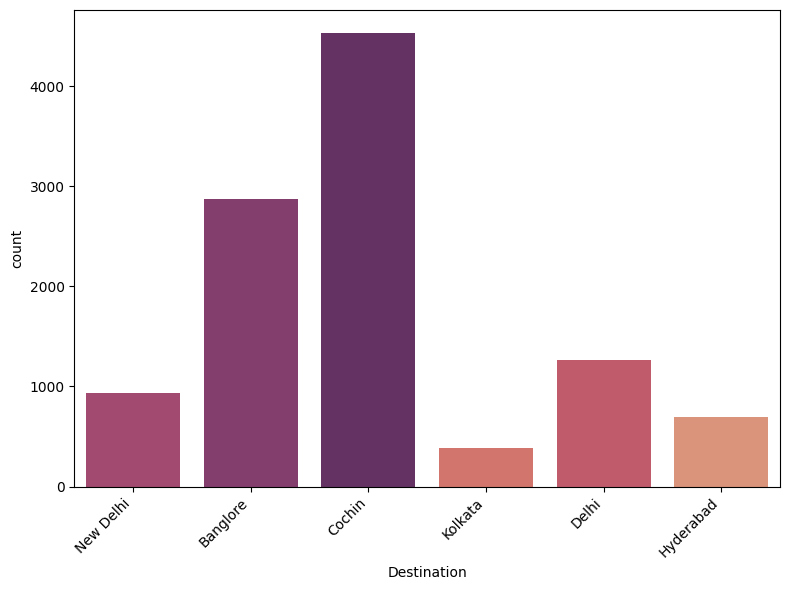

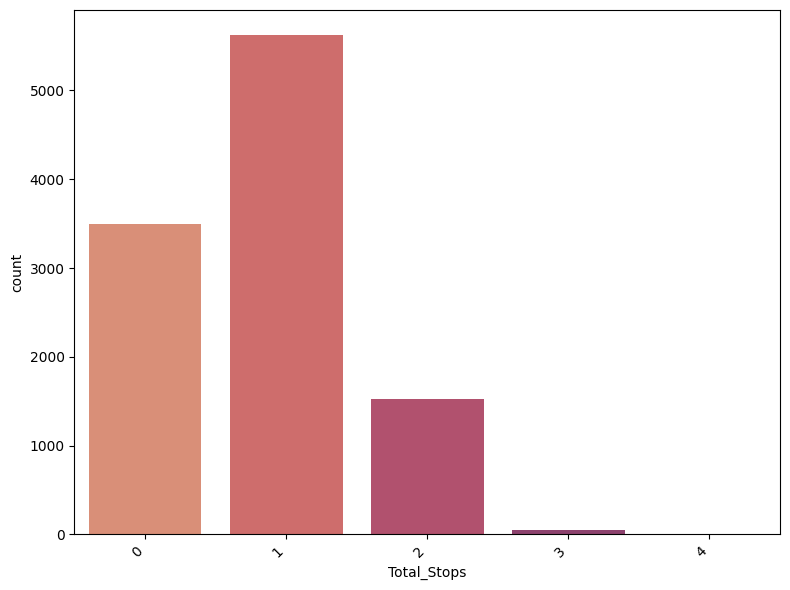

In [40]:
for i in ['Airline','Source','Destination', 'Total_Stops']:
    plt.figure(figsize = (8,6))
    sns.countplot(data = df, x=i,palette='flare')
    ax = sns.countplot(x=i, data = df.sort_values('Price', ascending=True), palette=sns.color_palette('flare', n_colors=len(df[i].unique())))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print('\n\n')

#### `Observations from the Data:`
   **1. Airline Popularity:** Jet Airways has the highest number of passengers, followed by IndiGo, indicating these airlines are the most frequently chosen by travelers in the dataset.
   
   **2. Source and Destination Trends:** The majority of passengers are traveling from Delhi, followed by Kolkata. The most common destination is Cochin, with Bangalore being the second most frequent destination.
   
   **3. Stopover Patterns:** A significant portion of travelers have at least one stop during their journey, followed by those with direct flights (zero stops). Passengers with two and three stopovers make up a smaller percentage of the dataset.

### **7.`Airline`**

In [41]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

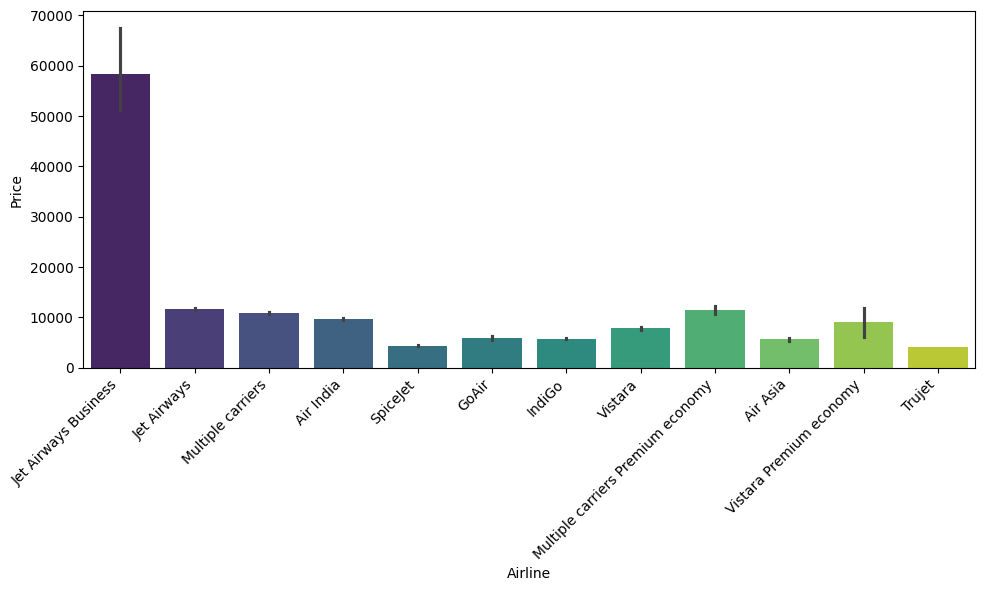

In [42]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False), palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()
print('\n\n')

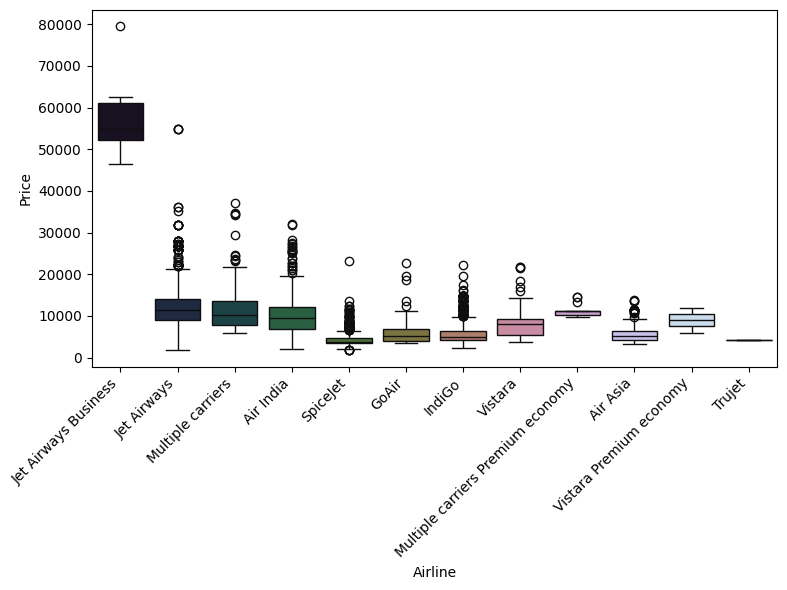

In [43]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False), palette='cubehelix')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()
print('\n\n')

#### `Observations from the Data:`
   **1. Outliers:** Lot of outliers are found in Jet Airways and other airline data

In [44]:
df.groupby('Airline').describe()['Price'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


In [45]:
# Set plot style
sns.set(style="whitegrid")

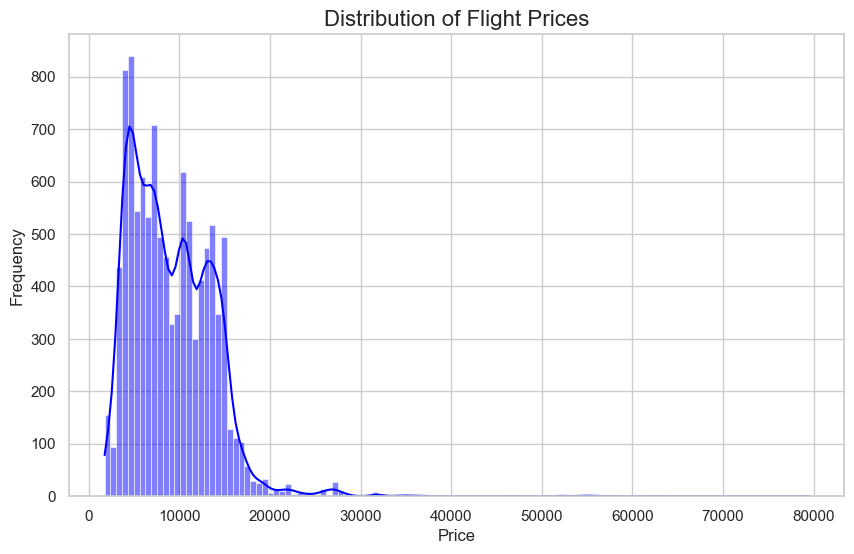

In [46]:
# 1. Distribution of Flight Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='Blue')
plt.title('Distribution of Flight Prices', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


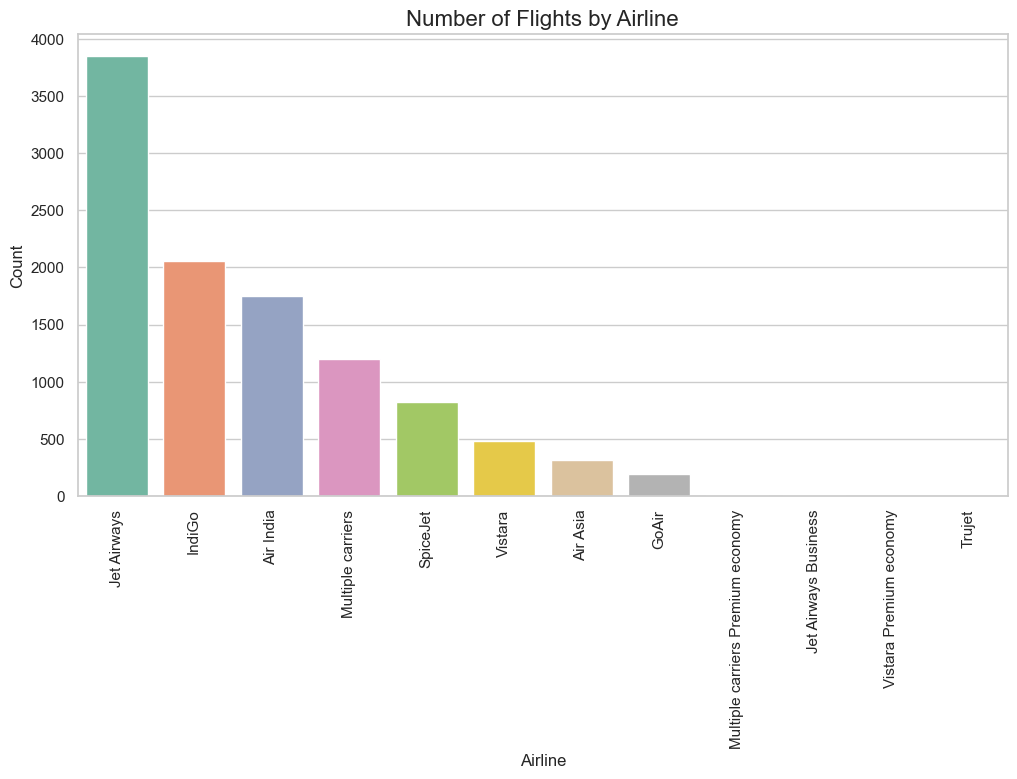

In [47]:
# 2. Count of Flights by Airline
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Airline', palette='Set2', order=df['Airline'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Flights by Airline', fontsize=16)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

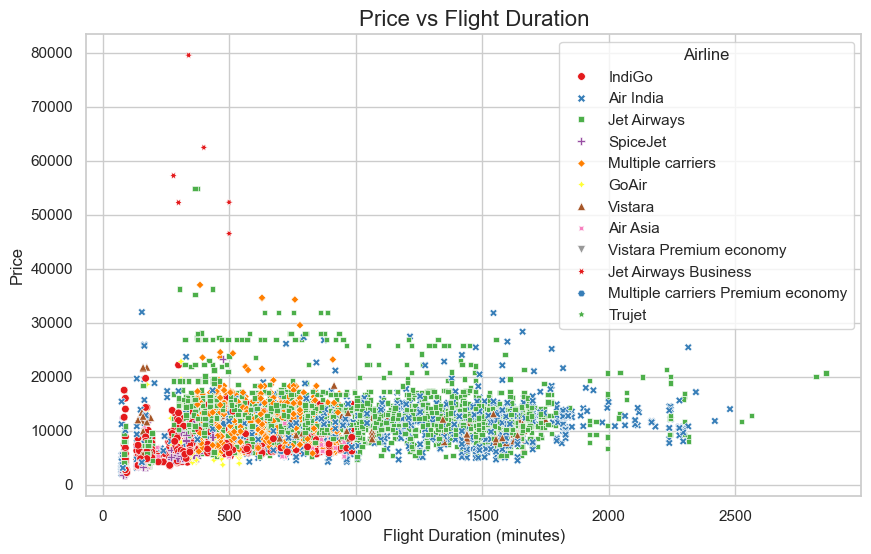

In [48]:
# 3. Relationship between Price and Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration', y='Price', hue='Airline', palette='Set1', style='Airline',s=30)
plt.title('Price vs Flight Duration', fontsize=16)
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Price')
plt.show()

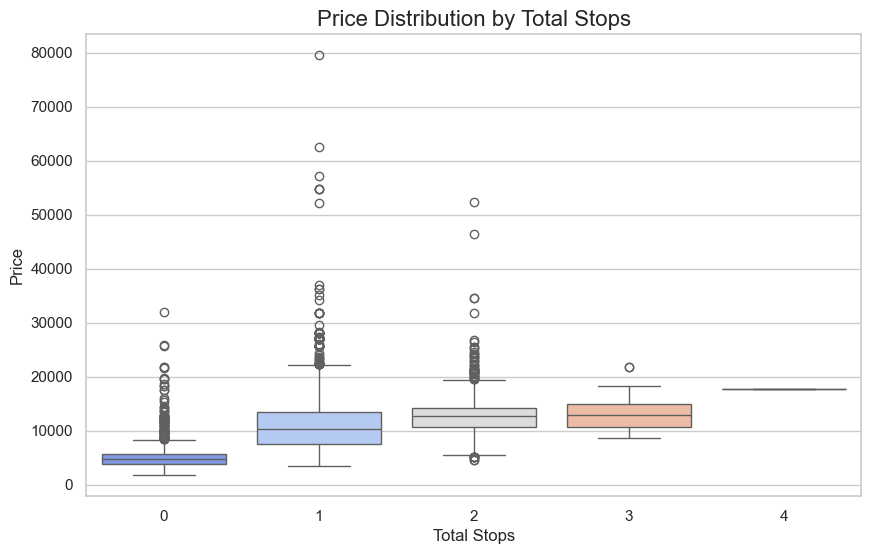

In [49]:
# 4. Price Distribution by Total Stops
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Total_Stops', y='Price', palette='coolwarm')
plt.title('Price Distribution by Total Stops', fontsize=16)
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

#### `Here are the insights from the exploratory data analysis:`

**1. Distribution of Flight Prices:** The price distribution is right-skewed, indicating that most flights are priced within a certain lower range, with fewer flights at higher prices.

**2.Number of Flights by Airline:** IndiGo and Jet Airways have the most number of flights in the dataset, while other airlines have fewer flights. This suggests that these two airlines dominate the flight market in this dataset.

**3.Price vs Flight Duration:** There is a positive correlation between flight duration and price. Longer flights, especially those with more stops, tend to have higher prices. Jet Airways has the highest-priced flights, particularly for longer durations.

**4.Price Distribution by Total Stops:** Flights with no stops generally have a lower price range. As the number of stops increases, so does the variability in price, with flights having two or more stops often being more expensive.

### Source and Destination

Let's delve into the effect of various factors such as source, destination, departure/arrival times, and additional flight information on the pricing of flights. We can analyze and visualize how these factors influence the ticket prices.

`Here's what we'll focus on:`

**1. Source & Destination:** How the cities of origin and destination affect the price.

**2. Departure/Arrival Time:** The relationship between flight prices and the time of departure/arrival.

**3. Additional Info:** How different types of additional information affect pricing.

### 1.` Analyzing the effect of Source and Destination on Price`

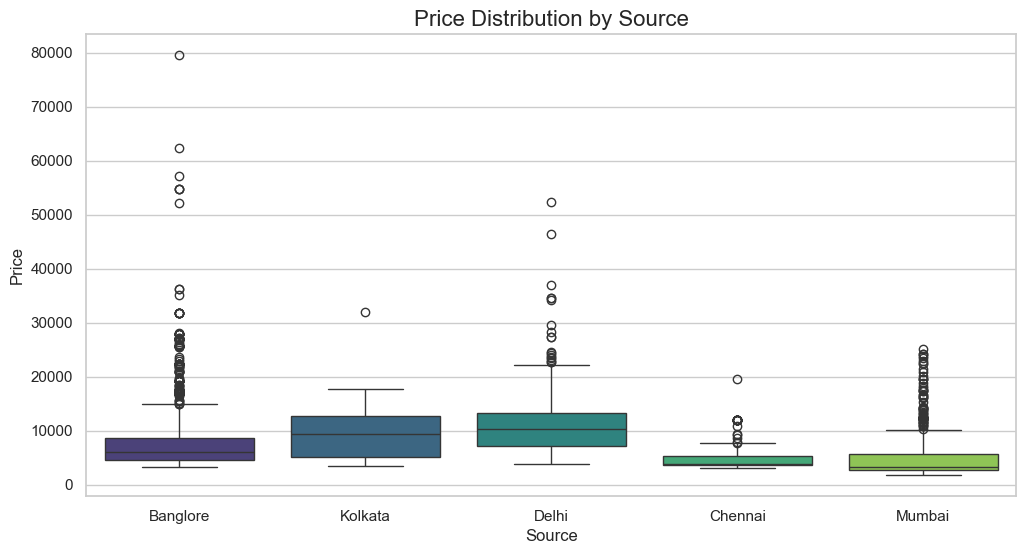

In [50]:
# 1. Analyzing the effect of Source and Destination on Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Source', y='Price', palette='viridis')
plt.title('Price Distribution by Source', fontsize=16)
plt.xlabel('Source')
plt.ylabel('Price')
plt.show()

**1. `Price Distribution by Source:`**
    Cities with more air traffic, such as Delhi or Mumbai, may have a wider range of prices due to the availability of multiple airlines and routes. Smaller cities might show a more consistent price range.

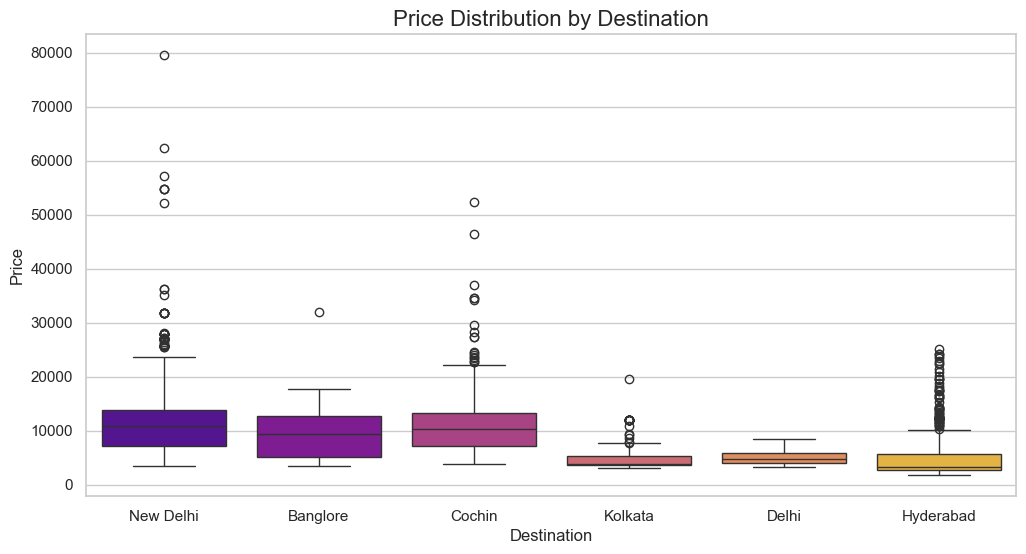

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Destination', y='Price', palette='plasma')
plt.title('Price Distribution by Destination', fontsize=16)
plt.xlabel('Destination')
plt.ylabel('Price')
plt.show()

**2. `Price Distribution by Destination:`**
    High-demand destinations, like tourist spots or business hubs (e.g., New Delhi, Mumbai, Bangalore), might have higher and more variable prices due to demand surges. Less frequented destinations might show lower prices with less variability.

In [52]:
# df.head()

### 2.` Analyzing the effect of Departure and Arrival Time on Price`


In [53]:
# 2. Analyzing the effect of Departure and Arrival Time on Price

# Convert 'Dep_Time' and 'Arrival_Time' to datetime.time format for analysis
# data['Dep_Time'] = pd.to_datetime(df['Dep_Time']).dt.time
# data['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'].apply(lambda x: x.split()[0])).dt.time

# Extract hour from Dep_Time and Arrival_Time for better analysis
# data['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M:%S').dt.hour
# data['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M:%S').dt.hour


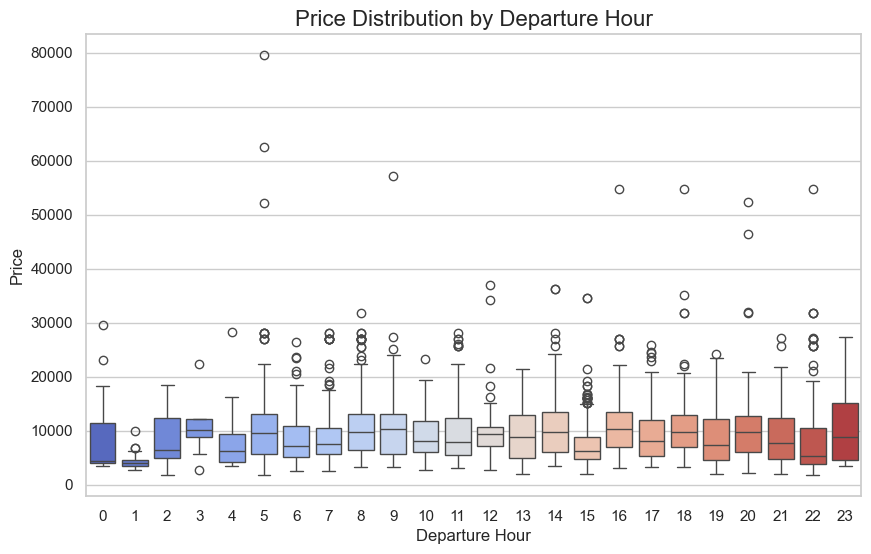

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dept_hour', y='Price', palette='coolwarm')
plt.title('Price Distribution by Departure Hour', fontsize=16)
plt.xlabel('Departure Hour')
plt.ylabel('Price')
plt.show()

**3. `Price Distribution by Departure Hour:`**
     Flights departing during peak hours (e.g., early morning or late evening) might show higher prices due to demand. In contrast, flights at off-peak hours (e.g., midday or late night) could have more stable and lower prices.

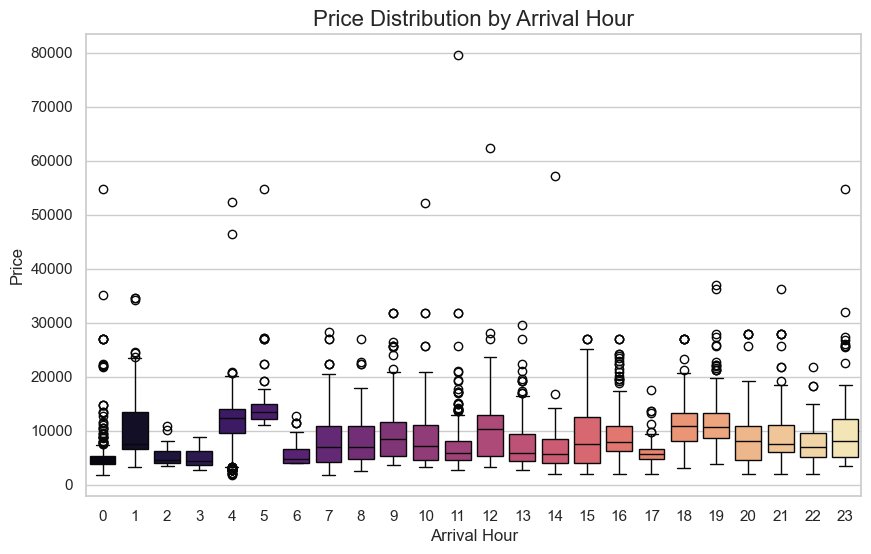

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Arrival_hours', y='Price', palette='magma')
plt.title('Price Distribution by Arrival Hour', fontsize=16)
plt.xlabel('Arrival Hour')
plt.ylabel('Price')
plt.show()

**4. `Price Distribution by Arrival Hour:`**
    Similar to the departure hour, flights arriving during peak business or travel times may have higher prices, while flights arriving late at night or very early in the morning might be priced lower.

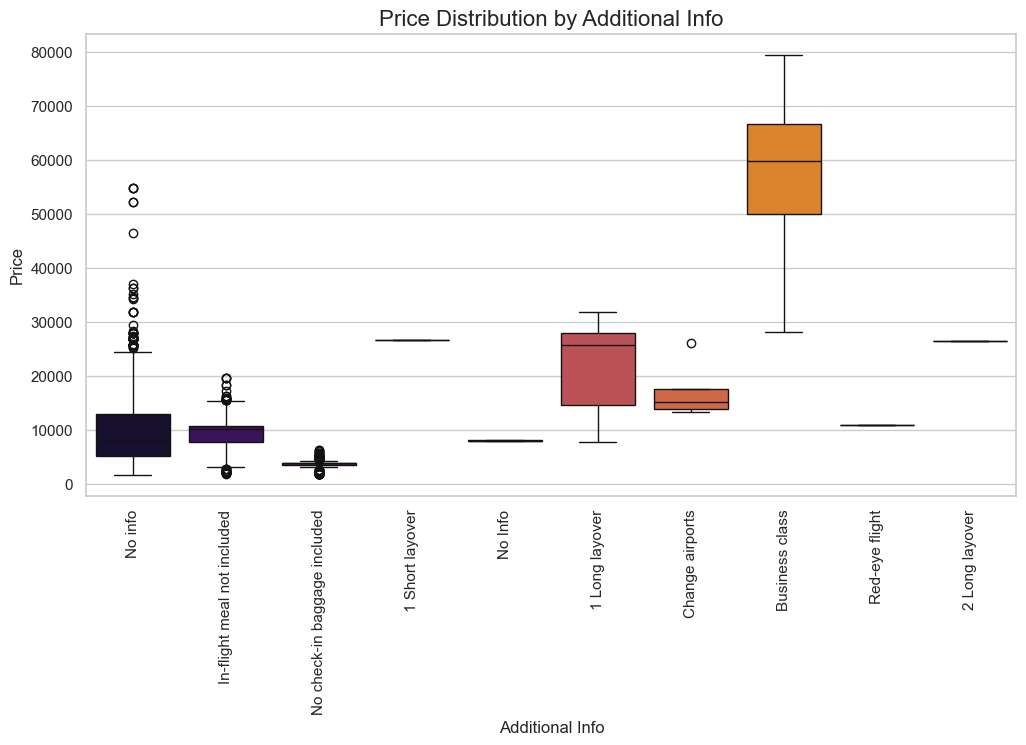

In [56]:
# 3. Analyzing the effect of Additional Info on Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Additional_Info', y='Price', palette='inferno')
plt.xticks(rotation=90)
plt.title('Price Distribution by Additional Info', fontsize=16)
plt.xlabel('Additional Info')
plt.ylabel('Price')
plt.show()

**4. `Additional Info:`**
    Flights with more amenities or better service (e.g., meals included, extra baggage allowance) might be more expensive. Meanwhile, "No Info" flights are likely to be lower in price.

In [57]:
df.dtypes

Airline            object
Source             object
Destination        object
Duration            int64
Total_Stops         int64
Additional_Info    object
Price               int64
Day                 int32
Month               int32
Arrival_hours       int32
Arrival_min         int32
Dept_hour           int32
Dept_min            int32
dtype: object